In [47]:
#import fastai
from fastai.vision.all import *

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
path = '/content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images'
model_name = 'PwV_Classifier'

In [50]:
batch_size = 20
img_size = 200

In [51]:
extra_tfms = []

In [52]:
#Transforms
method = ResizeMethod.Pad
item_tfms = [Resize(img_size, method = method, pad_mode = 'zeros')]
batch_tfms = [Normalize.from_stats(*imagenet_stats),
            *aug_transforms(size=img_size, flip_vert=False,max_rotate=0,max_lighting=0.1,
                            max_warp=0, max_zoom=1.05, min_zoom=0.95)]

In [53]:
# Build dataset
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2,splitter=RandomSplitter(seed=42),
                                    bs=batch_size,
                                    item_tfms=item_tfms,
                                    batch_tfms=batch_tfms
                                   )

In [54]:
#check classes
data.vocab

['NoVehicle', 'Vehicle']

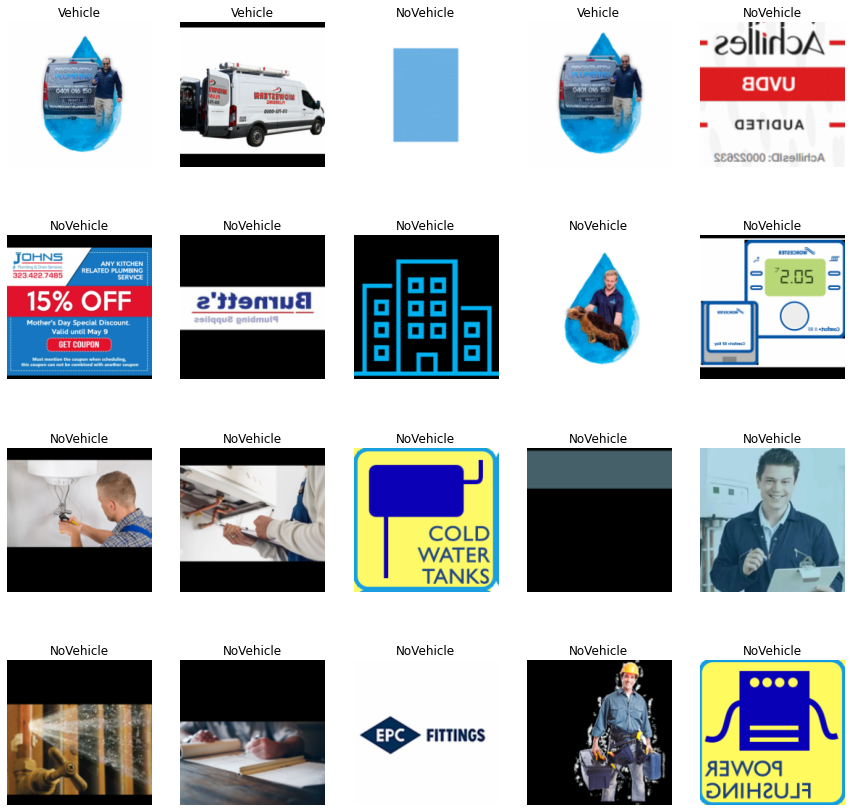

In [55]:
# show some data
data.show_batch(max_n = 20, figsize = (15,15))

In [56]:
# Initiate model
learn = vision_learner(data, resnet18, metrics=error_rate).to_fp16()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [57]:
# Show loss function
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

epoch,train_loss,valid_loss,error_rate,time
0,0.753397,0.337131,0.144712,00:14
1,0.298816,0.119088,0.046382,00:15


Better model found at epoch 0 with error_rate value: 0.144712433218956.


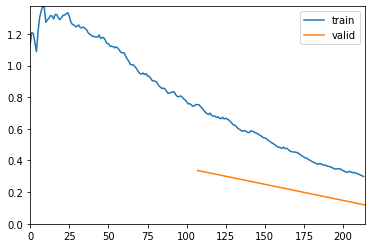

Better model found at epoch 1 with error_rate value: 0.04638218134641647.


epoch,train_loss,valid_loss,error_rate,time
0,0.131429,0.059670,0.014842,00:15
1,0.093015,0.042909,0.016698,00:15
2,0.084748,0.055420,0.022263,00:14
3,0.076183,0.075757,0.020408,00:16
4,0.063166,0.065030,0.020408,00:15
5,0.051124,0.049765,0.014842,00:15
6,0.055855,0.059799,0.016698,00:15
7,0.061997,0.088209,0.020408,00:15
8,0.051497,0.053443,0.020408,00:15
9,0.070492,0.039520,0.016698,00:16


Better model found at epoch 0 with error_rate value: 0.014842299744486809.


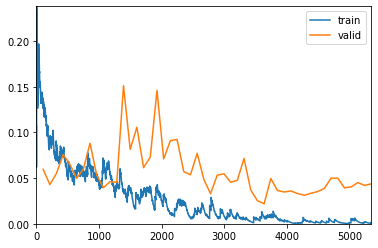

Better model found at epoch 10 with error_rate value: 0.01113172434270382.
Better model found at epoch 24 with error_rate value: 0.0092764375731349.
Better model found at epoch 33 with error_rate value: 0.007421151269227266.


In [58]:
train_model = True
if train_model:
    learn.fine_tune(50,freeze_epochs=2,cbs = [ShowGraphCallback(),
                            SaveModelCallback(monitor='error_rate',with_opt=True, fname=model_name)])

In [59]:
# reload the best model
learn.load(model_name)
learn = learn.to_fp32()
learn.export('models/'+model_name+'.pkl')

In [60]:
interp = Interpretation.from_learner(learn)

In [61]:
interp = Interpretation.from_learner(learn)
loss = interp.losses.mean()

In [62]:
'models/'+model_name+'.pkl'

'models/PwV_Classifier.pkl'

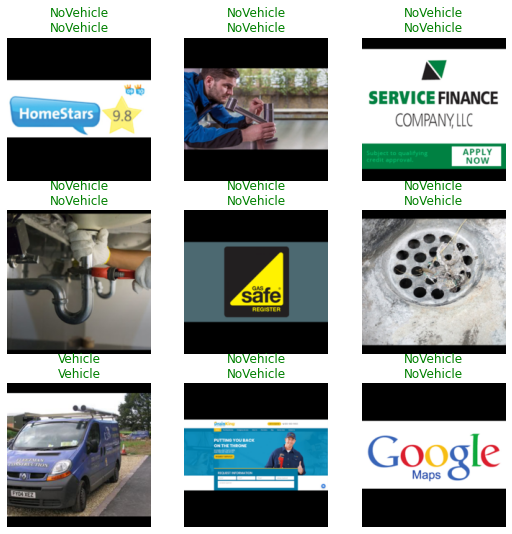

In [63]:
learn.show_results()

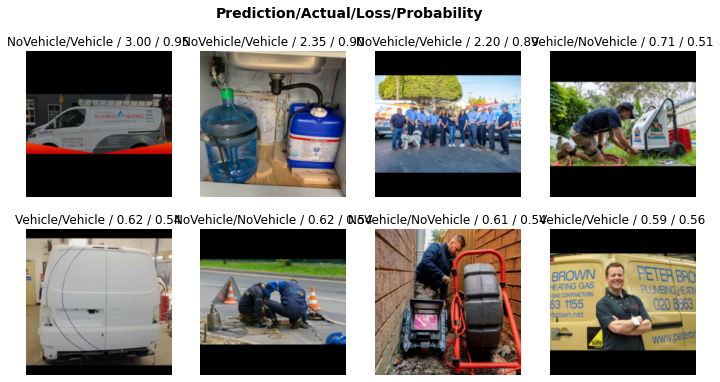

In [64]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(8)

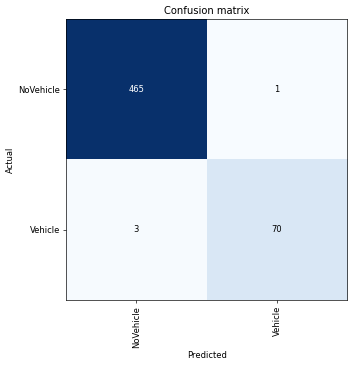

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)